In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Определить предметную область
Сгенерировать набор данных
Найти правила
Поддержка (support)
Уверенность (confidence)
Лифт (lift)
Рычаг (leverage)
Убежденность (conv)

In [19]:
data = pd.read_csv('csv/online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Уникальные значения товаров

In [20]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

# Очистка данных
На данном этапе нужно очистить данные чтобы с ними было возможно работать. Проверим значение цены.
Все данные, которые не имеют или имеют отрицательную цену должны быть очищены

In [21]:
data.loc[data['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,15287,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,15287,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,15287,United Kingdom


In [22]:
data = data[data['UnitPrice'] > 0]

In [23]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Добавим колонку с куплей/продажей

In [24]:
data['Transaction'] = data['Quantity'].apply(lambda x: 'Sold' if x < 0 else 'Bought')
data['Transaction'].value_counts()

Transaction
Bought    530104
Sold        9288
Name: count, dtype: int64

# Топ 10 покупателей по числу проданных товаров

In [25]:
customer_totals = data.groupby('CustomerID')['Quantity'].sum()
sorted_totals = customer_totals.sort_values(ascending=False)
top_customers = sorted_totals.head(10)
top_customers

CustomerID
15287    418230
14646    196143
12415     76946
14911     76930
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
Name: Quantity, dtype: int64

In [26]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
data['Time'] = data['InvoiceDate'].dt.strftime('%H:%M:%S')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00


In [27]:
# Create new column with time interval labels
time = data['InvoiceDate'].dt.hour
data['Time of Day'] = [
    'Early Morning' if x < 6 else
    'Morning' if x < 12 else
    'Noon' if x < 14 else
    'Afternoon' if x < 18 else
    'Evening' if x < 22 else 'Night' for x in time]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought,2011-12-09,12:50:00,Noon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought,2011-12-09,12:50:00,Noon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00,Noon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00,Noon


<Axes: xlabel='Time of Day', ylabel='count'>

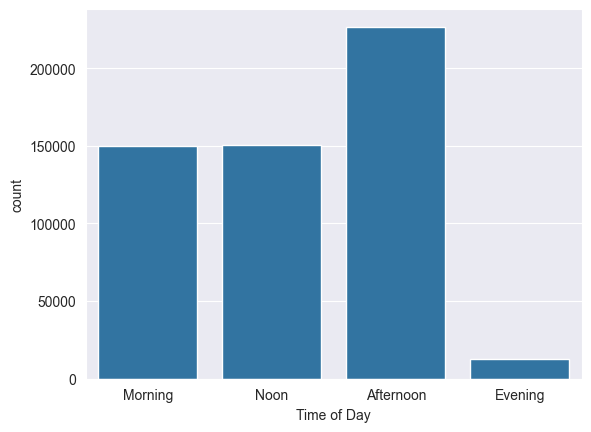

In [28]:
import seaborn as sns
sns.countplot(data, x='Time of Day')

# Assosiations (Market bucket)

In [29]:
df = pd.read_csv('csv/groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [30]:
df['transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)
df

,Member_number,Date,itemDescription,transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,4471_08-10-2014
38761,2022,23-02-2014,candy,2022_23-02-2014
38762,1097,16-04-2014,cake bar,1097_16-04-2014
38763,1510,03-12-2014,fruit/vegetable juice,1510_03-12-2014


In [31]:
df2 = pd.crosstab(df['transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = df2.applymap(encode)
basket_input

C:\Users\Stas\AppData\Local\Temp\ipykernel_11656\681029706.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_input = df2.applymap(encode)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24-01-2015,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4999_26-12-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_09-03-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Применим алгоритм Apriori

In [33]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

C:\Users\Stas\PycharmProjects\advanced-python\venv\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(sausage),0.021386,0.060349,0.001136,0.053125,0.880298,-0.000154,0.992371,-0.121998


Остортируем значения по поддержке, уверенности и лифту

In [34]:
rules.sort_values(["support", "confidence", "lift"], ascending=False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
623,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
622,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
695,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
694,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
551,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
550,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
649,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
648,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851
